# Final Project Data Analytics and Diagnostics

Nama: xxx 
NRP: xxx  
Class: [A]  

[Dataset](https://data.world/data-society/airlines-delay/workspace/file?filename=airlinedelaycauses%2FDelayedFlights.csv)

Silahkan dilanjutkan dengan melengkapi Analitika Diagnostik (deteksi outlier, identifikasi hubungan antar variabel data, atau klusterisasi data)

## Setup

In [2]:
# import libraries and dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import tabulate as tb
import matplotlib.pyplot as plt
    
from warnings import simplefilter, catch_warnings

from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import LabelEncoder, RobustScaler

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# import data
pd.set_option('display.max_columns', None)
simplefilter("ignore", category=ConvergenceWarning)
data = pd.read_csv('./dataset/airlinedelaycauses_DelayedFlights.csv')
data

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


# Preprocess 

## Removing Duplicates

In [3]:
print(f"Sum of duplicate objects: {data.duplicated().sum()}")

Sum of duplicate objects: 0


no duplicates are detected within the dataset, might as well remove observation unamed column

In [4]:
data.drop(columns='Unnamed: 0', inplace=True)

## Removing NaN/Null

In [5]:
total_rows = data.shape[0]
for col in data.columns:
    nans = data[col].isnull().sum()
    print(f'{col} => {nans} - {(nans/total_rows)*100:.2f}%')

Year => 0 - 0.00%
Month => 0 - 0.00%
DayofMonth => 0 - 0.00%
DayOfWeek => 0 - 0.00%
DepTime => 0 - 0.00%
CRSDepTime => 0 - 0.00%
ArrTime => 7110 - 0.37%
CRSArrTime => 0 - 0.00%
UniqueCarrier => 0 - 0.00%
FlightNum => 0 - 0.00%
TailNum => 5 - 0.00%
ActualElapsedTime => 8387 - 0.43%
CRSElapsedTime => 198 - 0.01%
AirTime => 8387 - 0.43%
ArrDelay => 8387 - 0.43%
DepDelay => 0 - 0.00%
Origin => 0 - 0.00%
Dest => 0 - 0.00%
Distance => 0 - 0.00%
TaxiIn => 7110 - 0.37%
TaxiOut => 455 - 0.02%
Cancelled => 0 - 0.00%
CancellationCode => 0 - 0.00%
Diverted => 0 - 0.00%
CarrierDelay => 689270 - 35.59%
WeatherDelay => 689270 - 35.59%
NASDelay => 689270 - 35.59%
SecurityDelay => 689270 - 35.59%
LateAircraftDelay => 689270 - 35.59%


Since `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay` and `LateAircraftDelay` contains quite a large amount of missing values, replacing them would not reflect the actual data in the field so I would just drop them 

In [6]:
for col in ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']:
    data.drop(columns=col, inplace=True)

for other columns, checking if those variables can be replaces with their respective means, i.e. if the distribution is close to normal

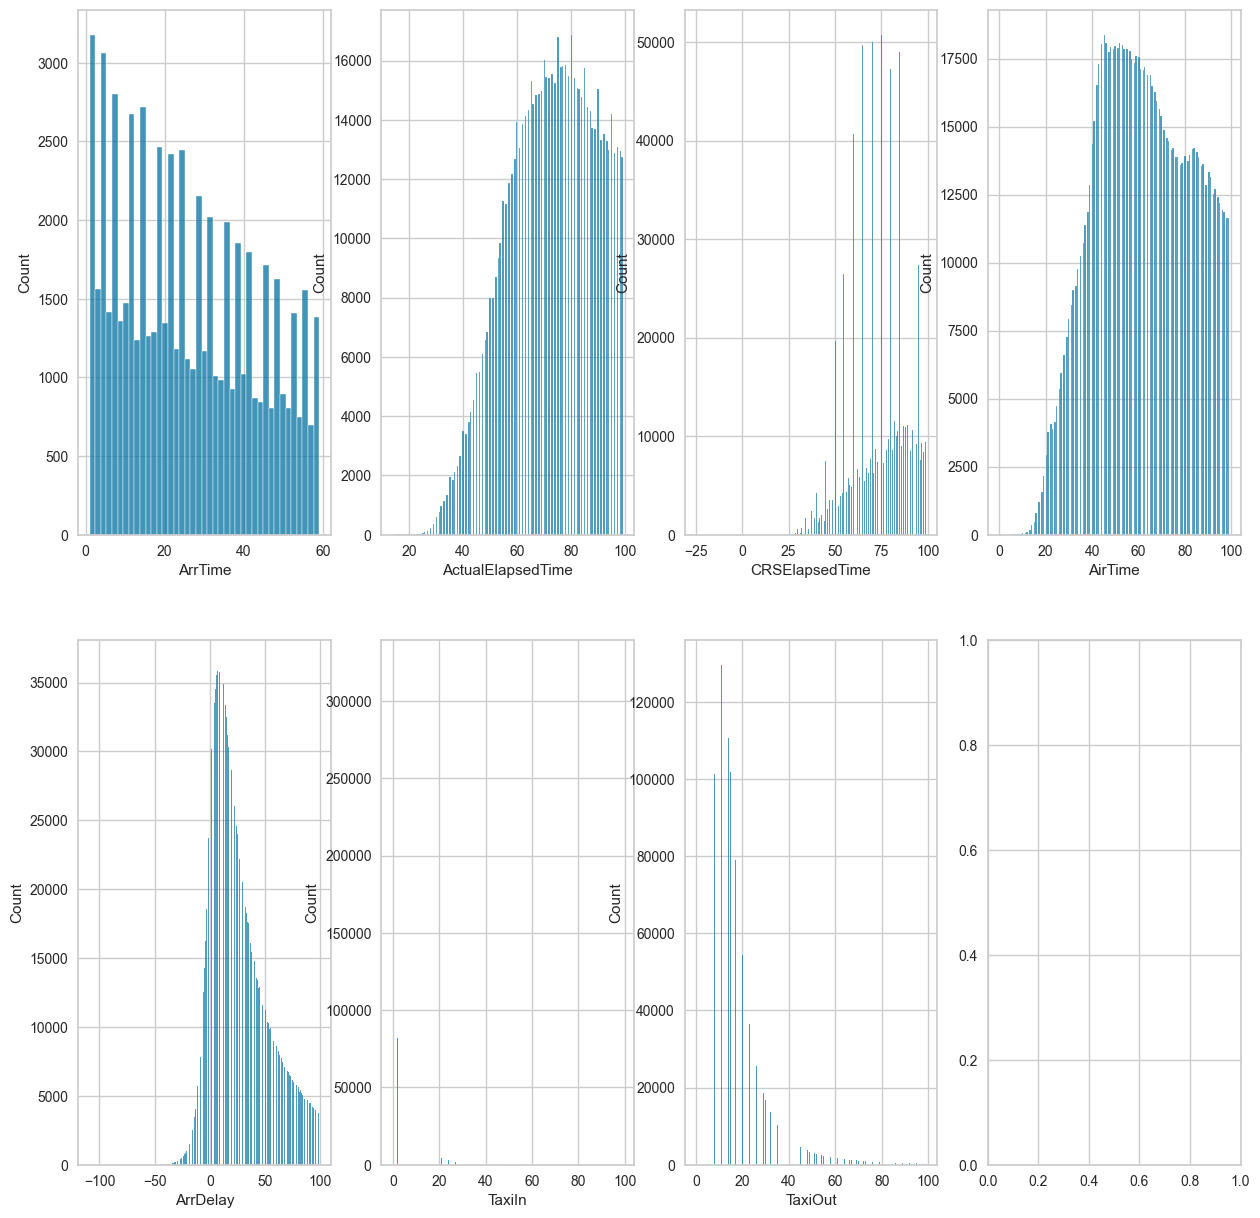

In [7]:
box_locs = pd.DataFrame({
    "vert": sorted(list(range(0, 6)) * 4),
    "horiz": list(range(0, 4)) * 6
})

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(15, 15))

for idx, col in enumerate(['ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'TaxiIn', 'TaxiOut']):
    sns.set_style("white")
    sns.histplot(x=data[col][data[col] < 100], ax=axs[box_locs.iloc[idx, 0]][box_locs.iloc[idx, 1]])

The closest thing to a normal distribution is `ArrDelay`, However all of them ultimately does not equally distribution thus we should not replace the NaNs with their **mean**, but the **median** instead

In [8]:
with catch_warnings():
    simplefilter("ignore")
    for col in ['ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'TaxiIn', 'TaxiOut']:
        print(f'replacing `{col}` missing values with median: {data[col].median()}')
        data[col].fillna(data[col].median(), inplace=True)

replacing `ArrTime` missing values with median: 1715.0
replacing `ActualElapsedTime` missing values with median: 116.0
replacing `CRSElapsedTime` missing values with median: 116.0
replacing `AirTime` missing values with median: 90.0
replacing `ArrDelay` missing values with median: 24.0
replacing `TaxiIn` missing values with median: 6.0
replacing `TaxiOut` missing values with median: 14.0


Notice that we `TailNum` still have an outlier, however we can't just fill in the missing values like we just did above because it is an categorical data. Instead, we're going to treat the missing values with **mode**.

In [9]:
data['TailNum'].fillna(data['TailNum'].mode()[0], inplace=True)

verify that the missing values are now gone

In [10]:
print(f'Sum of Null/NaN values: \n{data.isnull().sum()}', '\n')

Sum of Null/NaN values: 
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
dtype: int64 



## Encoding

In [11]:
enc_data = data.copy()
enc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
dtypes: float64(9), int64(10), object(5)
memory usage: 

In [12]:
for col in enc_data.columns:
    if enc_data[col].dtype == 'object':
        print(f'{col}[{enc_data[col].nunique()}] => {enc_data[col].unique()}')

UniqueCarrier[20] => ['WN' 'XE' 'YV' 'OH' 'OO' 'UA' 'US' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'NW'
 '9E' 'AA' 'AQ' 'AS' 'B6' 'CO']
TailNum[5366] => ['N712SW' 'N772SW' 'N428WN' ... 'N75428' 'N75429' 'N78008']
Origin[303] => ['IAD' 'IND' 'ISP' 'JAN' 'JAX' 'LAS' 'LAX' 'LBB' 'LIT' 'MAF' 'MCI' 'MCO'
 'MDW' 'MHT' 'MSY' 'OAK' 'OKC' 'OMA' 'ONT' 'ORF' 'PBI' 'PDX' 'PHL' 'PHX'
 'PIT' 'PVD' 'RDU' 'RNO' 'RSW' 'SAN' 'SAT' 'SDF' 'SEA' 'SFO' 'SJC' 'SLC'
 'SMF' 'SNA' 'STL' 'TPA' 'TUL' 'TUS' 'ABQ' 'ALB' 'AMA' 'AUS' 'BDL' 'BHM'
 'BNA' 'BOI' 'BUF' 'BUR' 'BWI' 'CLE' 'CMH' 'CRP' 'DAL' 'DEN' 'DTW' 'ELP'
 'FLL' 'GEG' 'HOU' 'HRL' 'ROC' 'ORD' 'EWR' 'SYR' 'IAH' 'CRW' 'FAT' 'COS'
 'MRY' 'LGB' 'BFL' 'EUG' 'ICT' 'MEM' 'BTV' 'MKE' 'LFT' 'BRO' 'PWM' 'MSP'
 'SRQ' 'CLT' 'CVG' 'GSO' 'SHV' 'DCA' 'TYS' 'GSP' 'RIC' 'DFW' 'BGR' 'DAY'
 'GRR' 'CHS' 'CAE' 'TLH' 'XNA' 'GPT' 'VPS' 'LGA' 'ATL' 'MSN' 'SAV' 'BTR'
 'LEX' 'LRD' 'MOB' 'MTJ' 'GRK' 'AEX' 'PNS' 'ABE' 'HSV' 'CHA' 'MFE' 'MLU'
 'DSM' 'MGM' 'AVL' 'LCH' 'BOS' 'MYR' 'CLL' 'DAB' 'ASE'

As far as I understand, none these categorical variables contain ordinal values. All of them contains binomial values which does not take in order as an importance. Thus we'll apply `LabelEncoder()` instead of `OrdinalEncoder()`

In [13]:
cat_vars = enc_data.select_dtypes(include='object')
for var in cat_vars.columns:
    cat_vars[var]=LabelEncoder().fit_transform(cat_vars[var])

cat_vars.head()

,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
0,17,3761,135,286,3
1,17,4121,135,286,3
2,17,1953,140,48,3
3,17,2134,140,48,3
4,17,3844,140,150,3


## Scaling

Scaling is a set of linear transformations that make all the features comparable. Imagine you have a feature A that spans around 10 and a feature B that spans around 1000. We don’t want our model to consider B more important than A only because it has a higher order of magnitude. That’s why we need to change the units of our features in order to make them comparable.

Also note that just because its numbers, doesnt mean it automatically a numerical variable. Some of the columns that's already been encoded into numerical should be handled as categorical values such as `Year`, `Month`, `DayofMonth`, `DayofWeek` and so on.

In [14]:
num_vars = [c if (enc_data[c].dtype == 'int64' or enc_data[c].dtype == 'float64') else None for c in enc_data.columns]
num_vars = [c for c in num_vars if c is not None]
num_vars = [c for c in num_vars if c not in ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum']]
num_vars = enc_data[num_vars]

num_scaled = RobustScaler().fit_transform(num_vars)
num_scaled = pd.DataFrame(num_scaled, columns=num_vars.columns)
num_scaled.head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,0.657102,0.654412,0.695652,0.754717,0.141176,0.409639,0.329114,-0.826087,-0.390244,0.309091,-0.50,-0.545455,0.0,0.0
1,-1.134864,-1.139706,-1.000000,-1.023222,0.141176,0.349398,0.291139,-0.478261,-0.121951,0.309091,-0.25,-0.363636,0.0,0.0
2,-1.315638,-1.308824,-1.277700,-1.386067,-0.235294,-0.313253,-0.177215,-0.217391,-0.390244,-0.137879,-0.75,0.272727,0.0,0.0
3,0.407461,0.360294,0.342216,0.319303,-0.305882,-0.313253,-0.164557,0.217391,0.243902,-0.137879,-0.75,-0.363636,0.0,0.0
4,0.566714,0.595588,0.569425,0.587808,-0.176471,-0.012048,-0.037975,-0.282609,0.024390,0.124242,-0.50,-0.363636,0.0,0.0


## Outlier

In [15]:
outlrs_df = pd.concat([cat_vars, num_scaled], axis=1)
outlrs_df.head()

,UniqueCarrier,TailNum,Origin,Dest,CancellationCode,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,17,3761,135,286,3,0.657102,0.654412,0.695652,0.754717,0.141176,0.409639,0.329114,-0.826087,-0.390244,0.309091,-0.50,-0.545455,0.0,0.0
1,17,4121,135,286,3,-1.134864,-1.139706,-1.000000,-1.023222,0.141176,0.349398,0.291139,-0.478261,-0.121951,0.309091,-0.25,-0.363636,0.0,0.0
2,17,1953,140,48,3,-1.315638,-1.308824,-1.277700,-1.386067,-0.235294,-0.313253,-0.177215,-0.217391,-0.390244,-0.137879,-0.75,0.272727,0.0,0.0
3,17,2134,140,48,3,0.407461,0.360294,0.342216,0.319303,-0.305882,-0.313253,-0.164557,0.217391,0.243902,-0.137879,-0.75,-0.363636,0.0,0.0
4,17,3844,140,150,3,0.566714,0.595588,0.569425,0.587808,-0.176471,-0.012048,-0.037975,-0.282609,0.024390,0.124242,-0.50,-0.363636,0.0,0.0


There's a lot of ways to handle outliers, in this case I've tried IQR, Standard Deviation and Z-Score and they perform quite the same, and I just chose the latter.

In [16]:
def out_zscore(df: pd.DataFrame, col, threshold=3):
  outliers = []
  zscores = []

  mean = np.mean(df[col])
  std = np.std(df[col])

  for idx in df[col]:
    z_score = (idx - mean) / std
    zscores.append(z_score)

    if np.abs(z_score) > threshold:
      outliers.append(idx)

  return outliers, zscores

def remove_outliers_ZScore(df: pd.DataFrame, columns, threshold=3, replace=False) -> pd.DataFrame:
  df = df.copy()
  data = []

  # iterate for every attributes
  for col in columns:

    # skip if not numerical
    if df[col].dtype != 'int64' and df[col].dtype != 'int32':
      continue

    outliers, _ = out_zscore(df, col, threshold)
    outliers_exist = len(outliers) > 0

    outliers_percentage = '0.00%'
    if outliers_exist:
      outliers_percentage = f'{(len(outliers) / df.shape[0]) * 100:.2f}%'

      # remove the outliers
      if replace:
        df = df[(df[col] < threshold) | (df[col] > -(threshold))]

    # check if the outlier still exist
    tmp, _ = out_zscore(df, col, threshold)
    outliers_status = len(tmp) > 0
    data.append([col, outliers_exist, outliers_status, threshold, len(outliers), outliers_percentage])


  # print information to debug
  table = tb.tabulate(data, headers=['Column', 'Outliers (Previous)', 'Outliers (Current)', 'Threshold', 'Count', 'Percentage'])
  print(table, '\n')

  return df

cleaned_data = remove_outliers_ZScore(outlrs_df, outlrs_df.columns, replace=False)
cleaned_data.head()

Column            Outliers (Previous)    Outliers (Current)      Threshold    Count  Percentage
----------------  ---------------------  --------------------  -----------  -------  ------------
UniqueCarrier     False                  False                           3        0  0.00%
TailNum           False                  False                           3        0  0.00%
Origin            False                  False                           3        0  0.00%
Dest              False                  False                           3        0  0.00%
CancellationCode  True                   True                            3      633  0.03% 



,UniqueCarrier,TailNum,Origin,Dest,CancellationCode,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,17,3761,135,286,3,0.657102,0.654412,0.695652,0.754717,0.141176,0.409639,0.329114,-0.826087,-0.390244,0.309091,-0.50,-0.545455,0.0,0.0
1,17,4121,135,286,3,-1.134864,-1.139706,-1.000000,-1.023222,0.141176,0.349398,0.291139,-0.478261,-0.121951,0.309091,-0.25,-0.363636,0.0,0.0
2,17,1953,140,48,3,-1.315638,-1.308824,-1.277700,-1.386067,-0.235294,-0.313253,-0.177215,-0.217391,-0.390244,-0.137879,-0.75,0.272727,0.0,0.0
3,17,2134,140,48,3,0.407461,0.360294,0.342216,0.319303,-0.305882,-0.313253,-0.164557,0.217391,0.243902,-0.137879,-0.75,-0.363636,0.0,0.0
4,17,3844,140,150,3,0.566714,0.595588,0.569425,0.587808,-0.176471,-0.012048,-0.037975,-0.282609,0.024390,0.124242,-0.50,-0.363636,0.0,0.0


Another method is to try Boxplot to detect outliers, However we're going to do this first with the numerical variables since it the categorical variables that have been encoded would present a wrong interpretation here in the boxplot

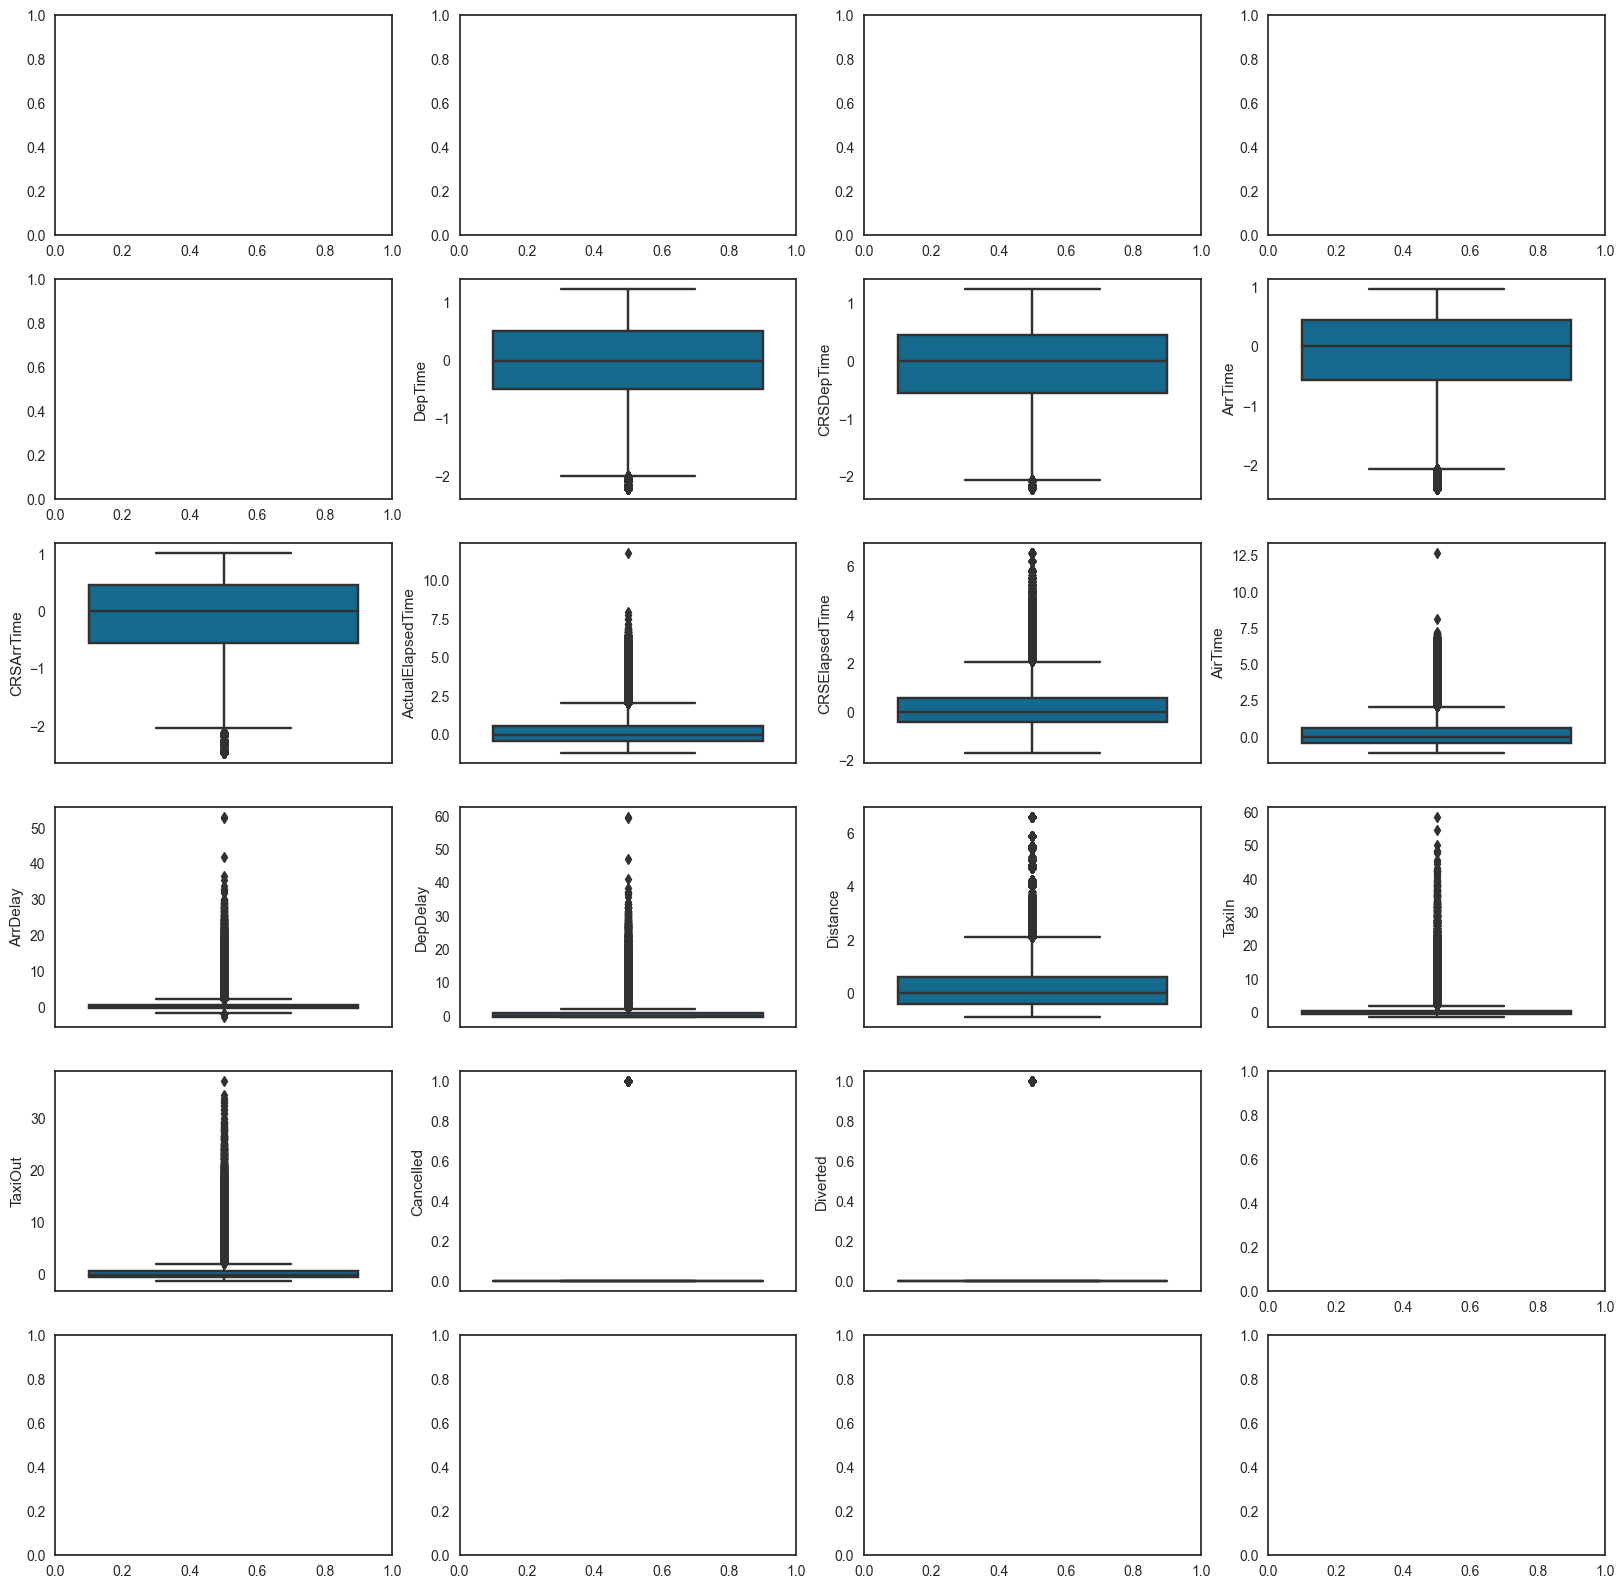

In [17]:
box_locs = pd.DataFrame({
    "vert": sorted(list(range(0,6)) * 4),
    "horiz": list(range(0,4)) * 6
})

fig, axs = plt.subplots(ncols=4, nrows=6, figsize=(20,20))

for idx,i in enumerate(outlrs_df.columns):
    if i not in cat_vars.columns:
        sns.boxplot(y=outlrs_df[i], ax=axs[box_locs.iloc[idx,0]][box_locs.iloc[idx,1]])

# Variable Correlation Visualization

## HeatMap

<Axes: >

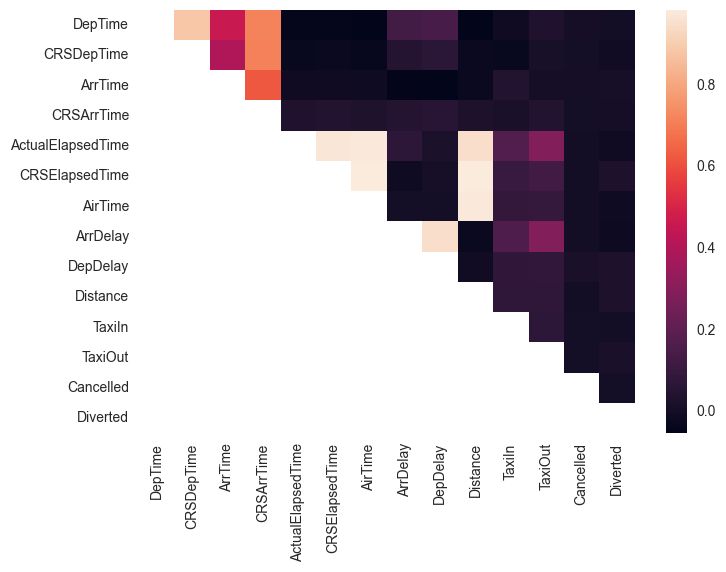

In [18]:
mask = np.zeros_like(num_vars.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(num_vars.corr(), mask=mask.T)

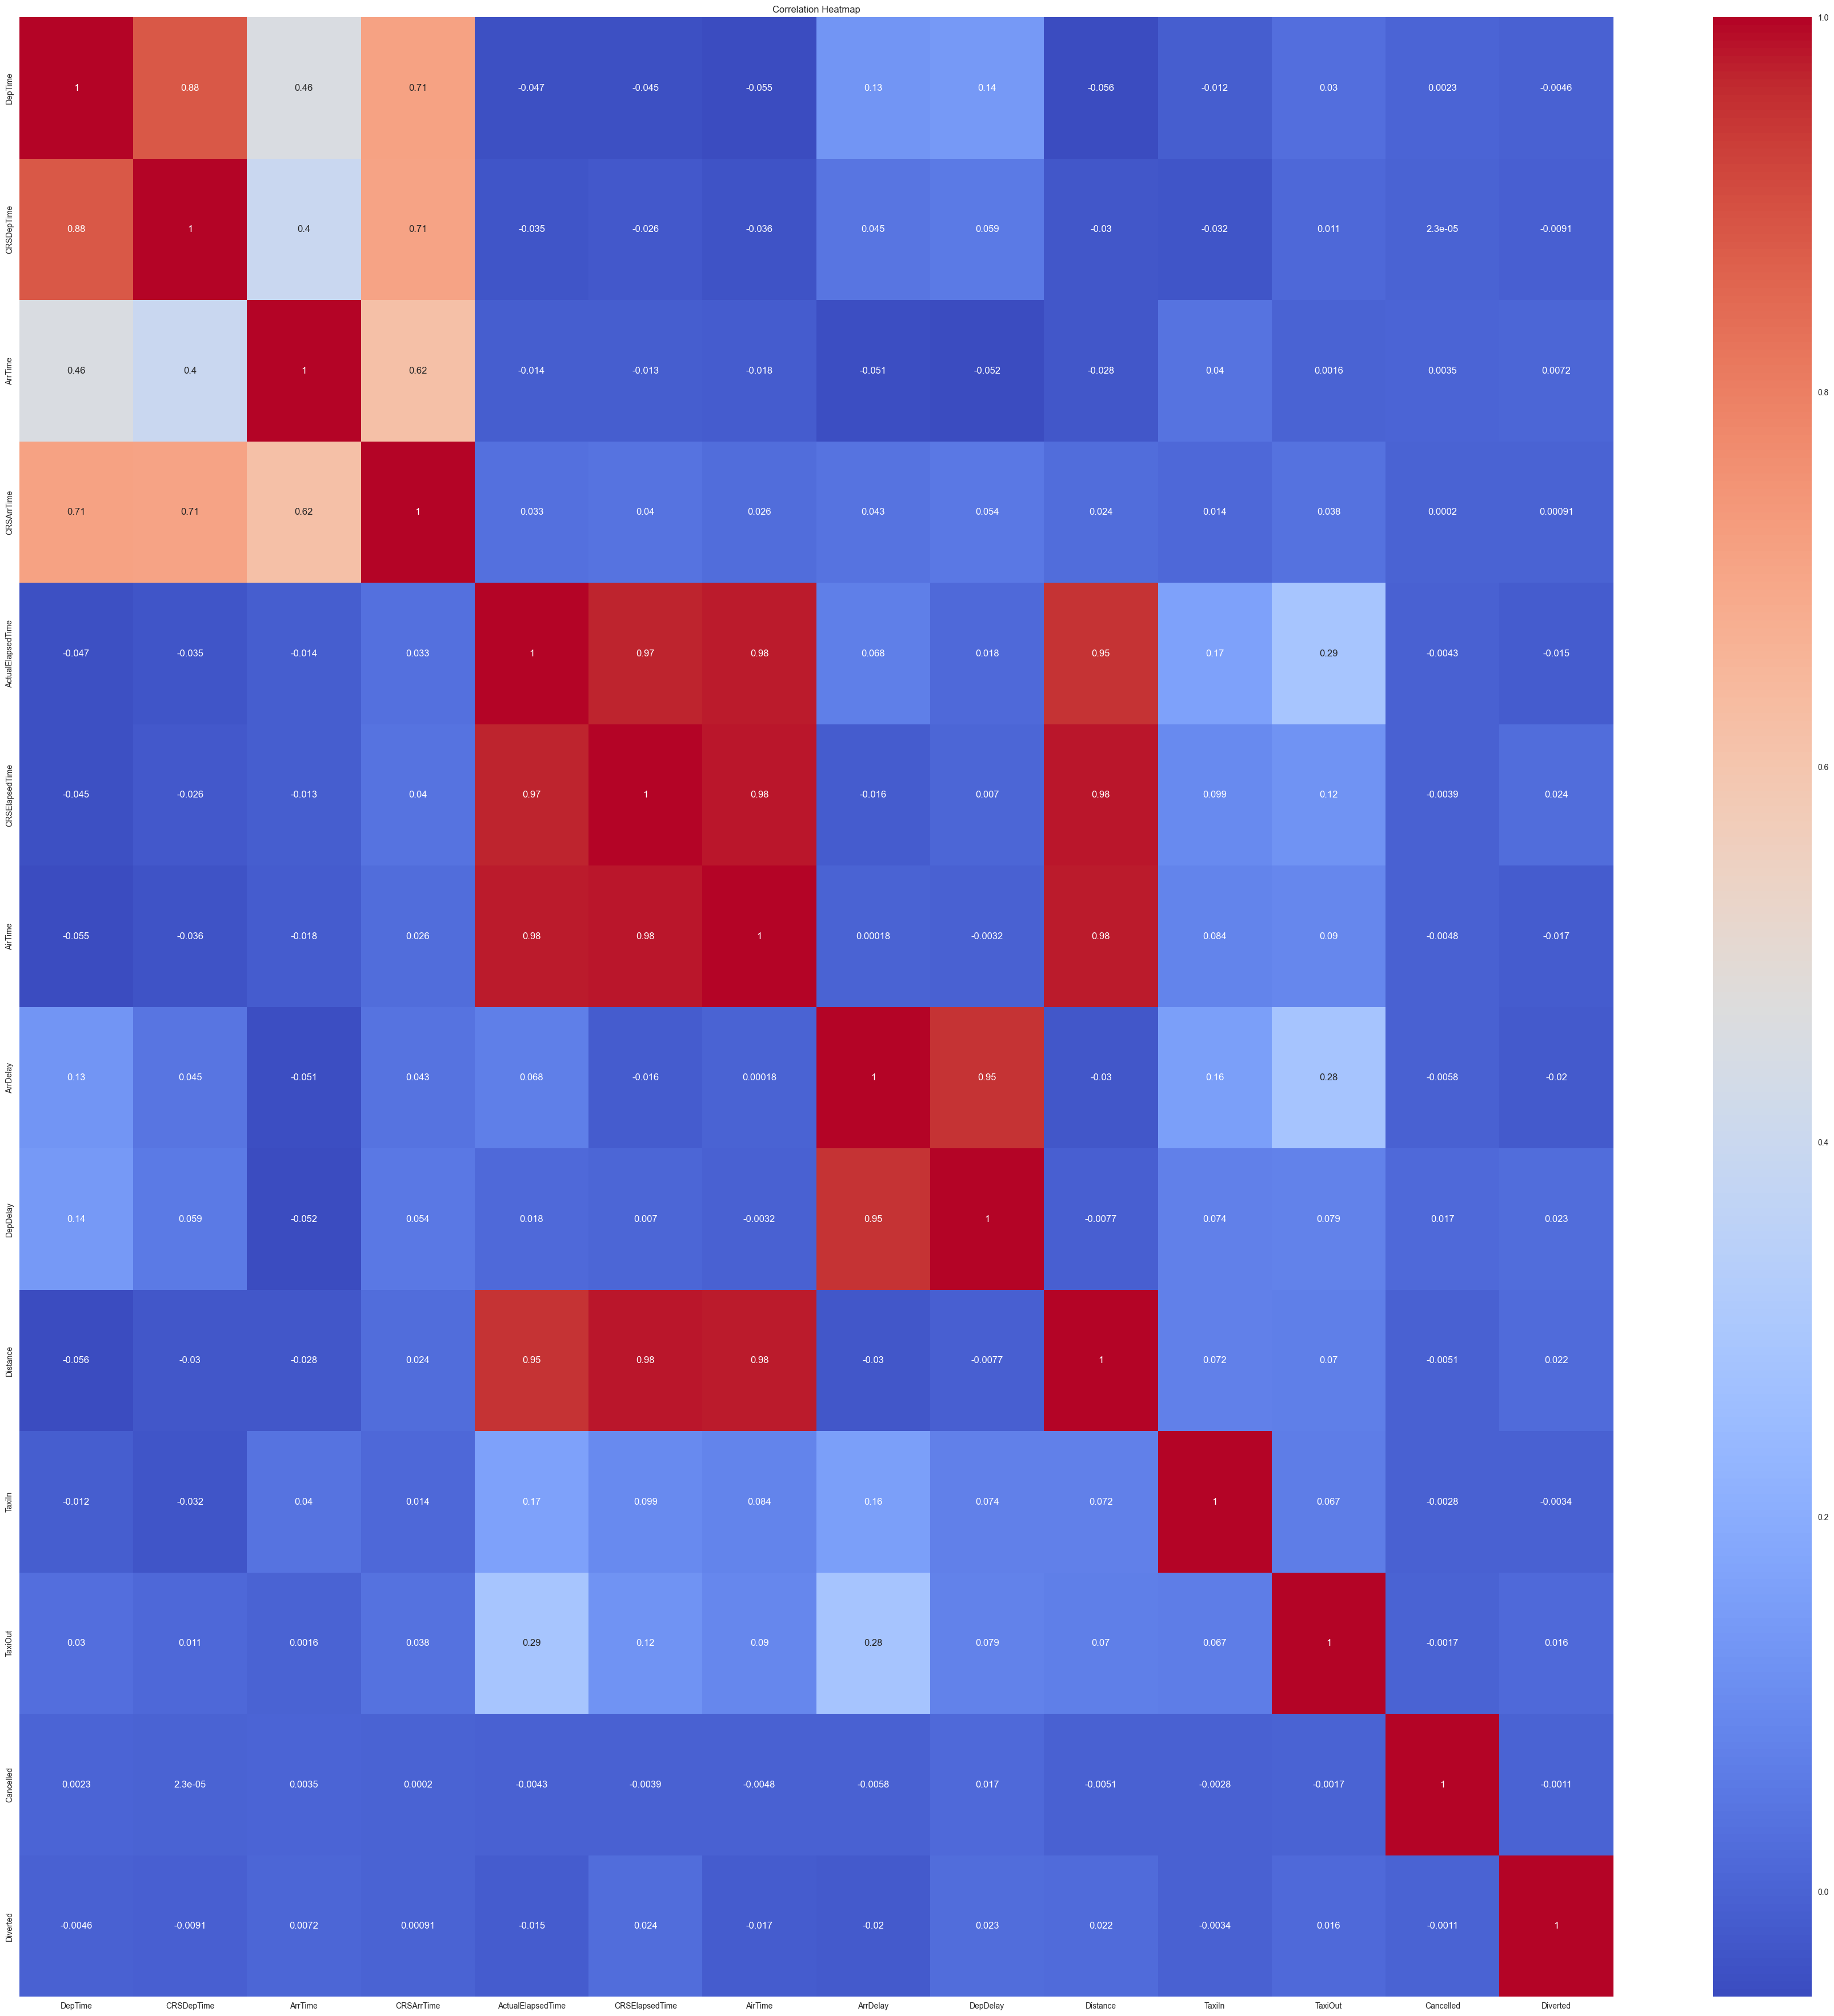

In [19]:
correlation_matrix = num_vars.corr()

plt.figure(figsize=(45, 45))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

High Correlation:
- Departure Time (`DepTime`) and Scheduled Departure Time (`CRSDepTime`)
- Scheduled Arrival Time (`CRSArTime`) and Departure Time (`DepTime`)
- Scheduled Arrival Time (`CRSArTime`) and Scheduled Departure Time (`CRSDepTime`)
- Actual Elapsed Time and Scheduled Actual Elapsed Time (`CRSElapsdTime`)
- Actual Elapsed Time and Air Time
- Air Time and Scheduled Actual Elapsed Time (`CRSElapsdTime`)
- Actual Elapsed Time, Scheduled Actual Elapsed Time (`CRSElapsdTime`) and Airtime with Distance
- Air Delay and Departure Delay (`DepDelay`)

Medium Correlation:
- Arrival Time (`ArrTime`) and  Scheduled Arrival Time (`CRSArTime`)

# Clustering

Using `Elbow Method` to visualize **distortion-speed** and determine the optimal number of cluster segmentation that we should form

- the **blue line** shows how total distortion (left y-label) decreases with increasing of number of clusters
- the **green line** shows the amount of time (right y-label) in seconds, to train the clustering model.


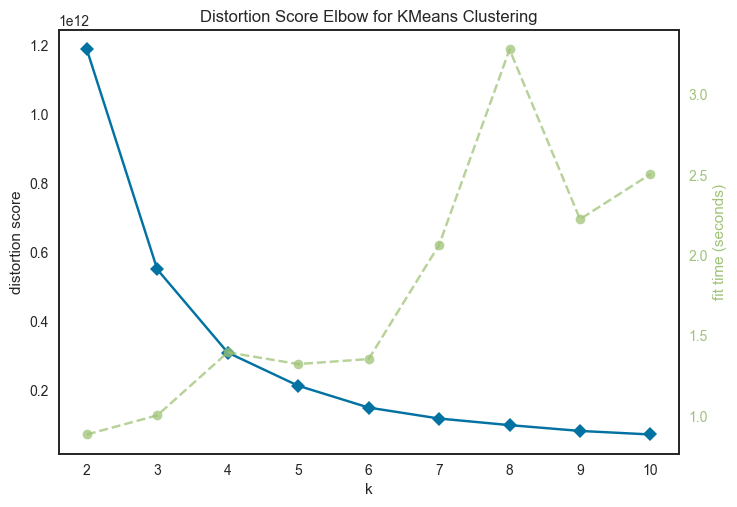

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
elbow = KElbowVisualizer(KMeans(n_init='auto', random_state=1), k=10, locate_elbow=False)
elbow.fit(cleaned_data)
elbow.show()

so, the number of cluster that we would form is 4

In [54]:
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=1337)
cluster = kmeans.fit_predict(cleaned_data)
cluster

array([0, 0, 3, ..., 2, 0, 2])

In [55]:
data['Cluster'] = cluster
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,Cluster
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,3
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,3
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,0


<Axes: xlabel='Cluster', ylabel='count'>

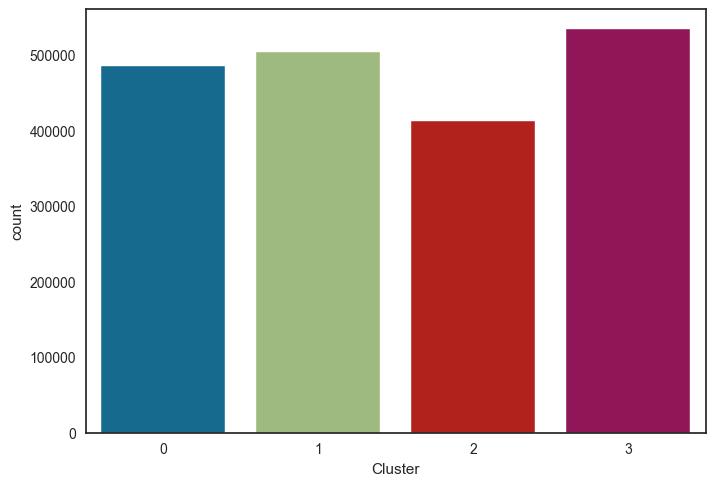

In [56]:
sns.countplot(x='Cluster', data=data)

At this point we would apply histograms to see how of the each categorical variable is mapped among the clusters to draw conclusions. 

However as you have seen above, the categorical variables contains hundreds if not thousands of unique values that would've been consume a lot of computing power. Not to mention it would also hard to draw conclusion with such method.

Not to say, that it might go out of scope of the assignment, I decided to stop here.

# References

- https://data.world/data-society/airlines-delay/workspace/file?filename=airlinedelaycauses%2FDelayedFlights.csv
- https://analyticsindiamag.com/how-to-detect-and-treat-outliers-in-categorical-data/
- https://analyticsindiamag.com/how-to-detect-and-treat-outliers-in-categorical-data/
- https://www.kaggle.com/code/vovaintouch/airline-passengers-pca-cluster-segmentation
- https://jocelyn-ong.github.io/clustering-of-airport-delays/